In [16]:
from PIL import Image #, ImageOps, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def display(pixels,row=1, column=2, index=1):
    plt.subplot(row, column, index)
    plt.imshow(pixels)
    plt.axis('off')
    plt.show()
    return

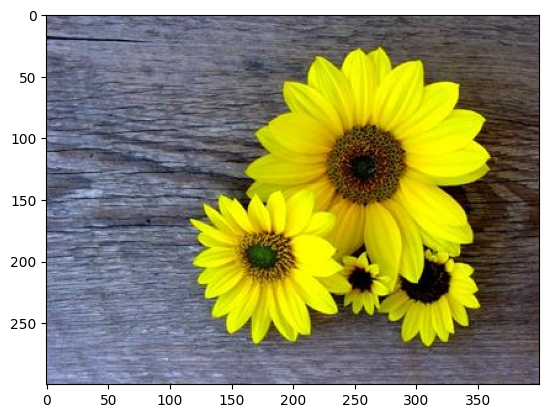

In [65]:
original_image = plt.imread('imgs/himawari.jpg')
if np.issubdtype(original_image.dtype, np.integer):
  original_image = original_image / np.iinfo(original_image.dtype).max
plt.imshow(original_image)

 https://qiita.com/aa_debdeb/items/9c5d5f93890265abfdec

In [20]:
def _convolve2d(image, kernel):
  shape = (image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1) + kernel.shape
  strides = image.strides * 2
  strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
  return np.einsum('kl,ijkl->ij', kernel, strided_image)

def _convolve2d_multichannel(image, kernel):
  convolved_image = np.empty((image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1, image.shape[2]))
  for i in range(image.shape[2]):
    convolved_image[:,:,i] = _convolve2d(image[:,:,i], kernel)
  return convolved_image

def _pad_singlechannel_image(image, kernel_shape, boundary):
  return np.pad(image, ((int(kernel_shape[0] / 2),), (int(kernel_shape[1] / 2),)), boundary)

def _pad_multichannel_image(image, kernel_shape, boundary):
  return  np.pad(image, ((int(kernel_shape[0] / 2),), (int(kernel_shape[1] / 2),), (0,)), boundary)

def convolve2d(image, kernel, boundary='edge'):
  if image.ndim == 2:
    pad_image = _pad_singlechannel_image(image, kernel.shape, boundary) if boundary is not None else image
    return _convolve2d(pad_image, kernel)
  elif image.ndim == 3:
    pad_image = _pad_multichannel_image(image, kernel.shape, boundary) if boundary is not None else image
    return _convolve2d_multichannel(pad_image, kernel)


In [15]:
def create_averaging_kernel(size = (5, 5)):
  return np.full(size, 1 / (size[0] * size[1]))

def create_gaussian_kernel(size=(5, 5), sigma=1):
  center = ((size[0] - 1) / 2, (size[1] - 1) / 2)
  sigma2 = 2 * sigma * sigma
  kernel = np.fromfunction(lambda y, x: np.exp(-((x - center[1]) ** 2 + (y - center[0]) ** 2) / sigma2), size)
  kernel = kernel / np.sum(kernel)
  return kernel

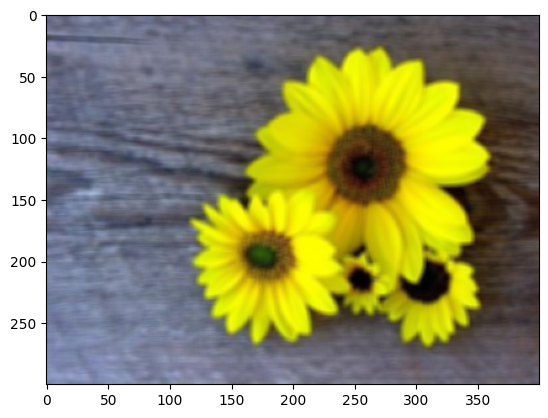

In [66]:
averaging_kernel_5x5 = create_averaging_kernel((5,5))
averaging_image_5x5 = convolve2d(original_image, averaging_kernel_5x5)
plt.imshow(averaging_image_5x5)

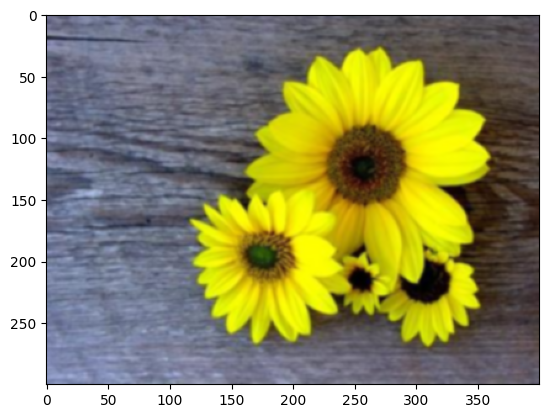

In [71]:
averaging_gaussian_5x5 = create_gaussian_kernel((5,5))
result_image = convolve2d(original_image, averaging_gaussian_5x5)
plt.imshow(result_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


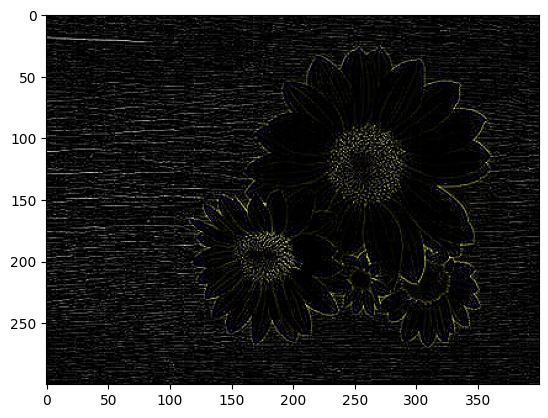

In [72]:
# Laplacian Filter (4 neighbors)
kernel_lap4 = np.array([[0, 1, 0],
                       [1, -4, 1], 
                       [0, 1, 0]])
result_image = convolve2d(original_image, kernel_lap4)
plt.imshow(result_image)

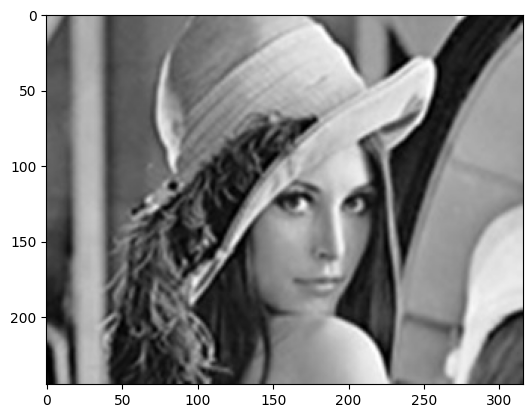

In [74]:
grey_image = plt.imread('../imgs/girl.jpg')
if np.issubdtype(original_image.dtype, np.integer):
  original_image = grey_image / np.iinfo(grey_image.dtype).max
plt.imshow(grey_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


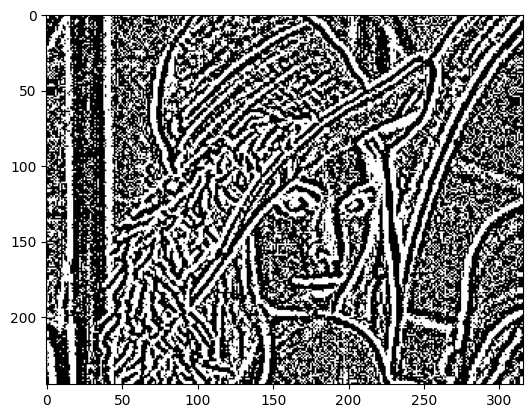

In [76]:
result_image = convolve2d(grey_image, kernel_lap4)
plt.imshow(result_image)